In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import scipy
import itertools

In [2]:
#file = r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\Datasets\ACLED_1997-01-01-2023-07-18_Somalia.csv"
file = r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/ACLED_1997-01-01-2023-07-18_Somalia.csv"
df = pd.read_csv(file)

In [3]:
v= df["event_date"]
v= v.values
dt = [datetime.strptime(v[i], "%d %B %Y") for i in range(len(v))]
q=[]

for i in range(len(dt)):
    q.append(datetime.timestamp(dt[i]))
    
df.insert(loc=3, column='date_timestamp', value=q)
df.sort_values("date_timestamp", inplace = True)

In [4]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.set_index('event_date', inplace=True)

In [5]:
fa=df[df['fatalities']>0]
n_conf=df.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

In [6]:
df.groupby(['admin1',pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

event_id_cnty
admin1          event_date               
Awdal           1999-06-30              1
                1999-10-31              1
                2002-09-30              1
                2006-01-31              1
                2006-03-31              1
...                                   ...
Woqooyi Galbeed 2022-10-31              1
                2022-12-31              2
                2023-05-31              1
                2023-06-30              1
                2023-07-31              1

[3781 rows x 1 columns]

In [7]:
aw=df[df['admin1']=='Awdal']

In [8]:
batt=df[df['event_type']=='Violence against civilians']
n_batt=batt.groupby([pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()
len(batt)

7896

Text(0.5, 0, 'Event date')

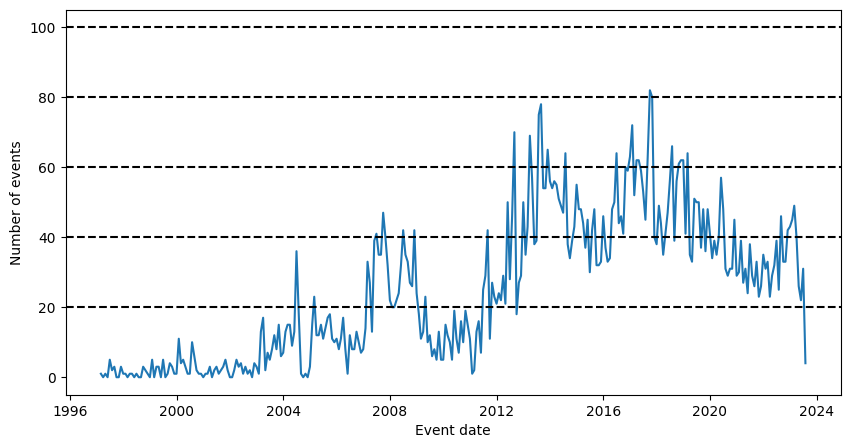

In [9]:
plt.figure(figsize=(10,5))
plt.plot(n_batt)
#plot horizontal line at y=80, 60, 40

plt.axhline(y=20, color='k', linestyle='--')
plt.axhline(y=40, color='k', linestyle='--')
plt.axhline(y=60, color='k', linestyle='--')
plt.axhline(y=80, color='k', linestyle='--')
plt.axhline(y=100, color='k', linestyle='--')
plt.ylabel("Number of events")
plt.xlabel("Event date")

Text(0.5, 0, 'Event date')

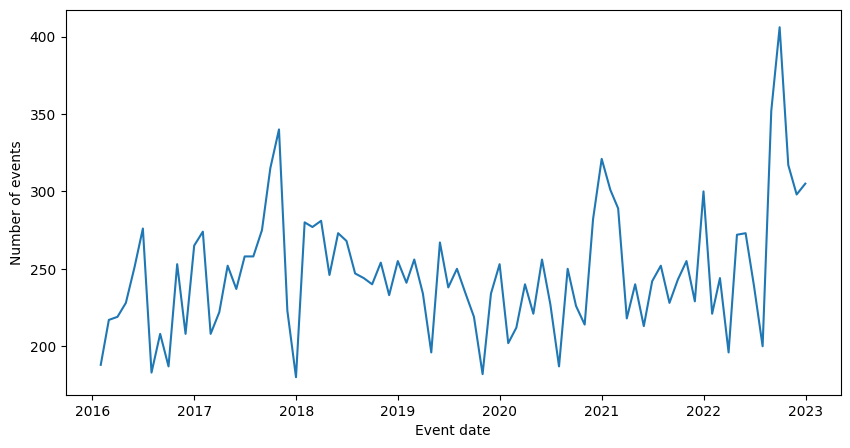

In [10]:
#restrict n_conf to 2016-2022
n_conf=n_conf.loc['2016-01-01':'2022-12-31']

plt.figure(figsize=(10,5))
plt.plot(n_conf)
#plot horizontal line at y=80, 60, 40

plt.ylabel("Number of events")
plt.xlabel("Event date")

In [35]:
reg_c

,admin1,event_date,event_id_cnty
0,Awdal,1999-06-30,1
1,Awdal,1999-10-31,1
2,Awdal,2002-09-30,1
3,Awdal,2006-01-31,1
4,Awdal,2006-03-31,1
...,...,...,...
3776,Woqooyi Galbeed,2022-10-31,1
3777,Woqooyi Galbeed,2022-12-31,2
3778,Woqooyi Galbeed,2023-05-31,1
3779,Woqooyi Galbeed,2023-06-30,1


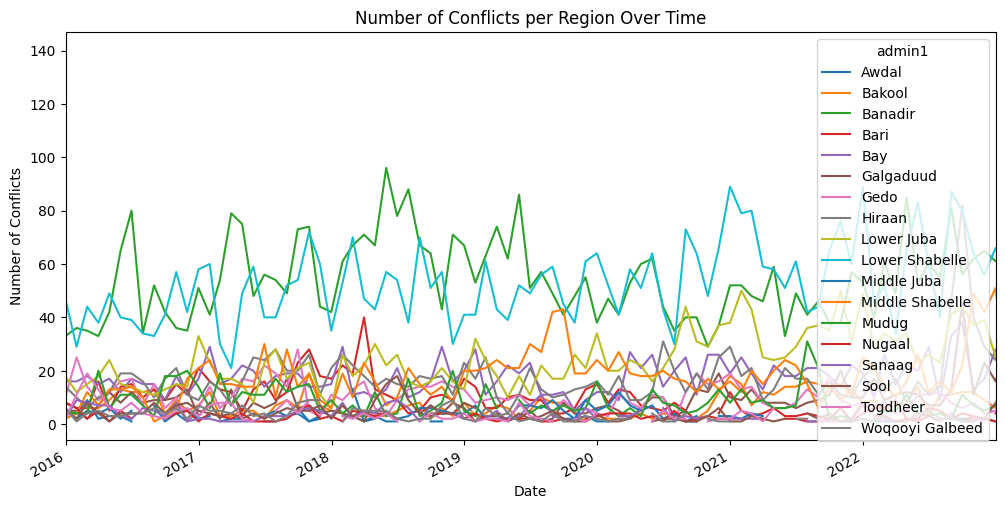

In [36]:
#plot n_conf per region

reg_c= df.groupby(['admin1',pd.Grouper(freq='M')])["event_id_cnty"].count().to_frame()

reg_c.reset_index(inplace=True)
#reg_c=reg_c.loc['2016-01-01':'2022-12-31']
# subset reg_c from '2016-01-01' to '2022-12-31'
#reg_c = reg_c['event_date']
#plot reg_c per region
reg_c_pivot = reg_c.pivot(index='event_date', columns='admin1', values='event_id_cnty')

# Plot the data
reg_c_pivot.plot(kind='line', figsize=(12, 6))

# Set the title and labels
plt.title('Number of Conflicts per Region Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Conflicts')
#set x lim to 2016-2022
plt.xlim('2016-01-01', '2022-12-31')
# Show the plot
plt.show()



In [12]:
aw=df[df['admin1']=='Awdal']
#aw[aw['fatalities']>0]

In [13]:
b=df[df['event_type']=='Battles']
c=df[df['event_type']=='Violence against civilians']
print('total: ', len(df))
print('battles: ', len(b))
print('violence against civilians: ', len(c))

b1=fa[fa['event_type']=='Battles']
c1=fa[fa['event_type']=='Violence against civilians']
print('total, >0 fatalities: ', len(fa))
print('battles + violence against civilians, >0 fatalities: ', len(b1)+len(c1))

total:  41397
battles:  20151
violence against civilians:  7896
total, >0 fatalities:  17194
battles + violence against civilians, >0 fatalities:  13604


In [14]:
reg = df.groupby(["region"])["fatalities"].sum().index.tolist()
viol = df.groupby(["event_type"])["fatalities"].sum().index.tolist()

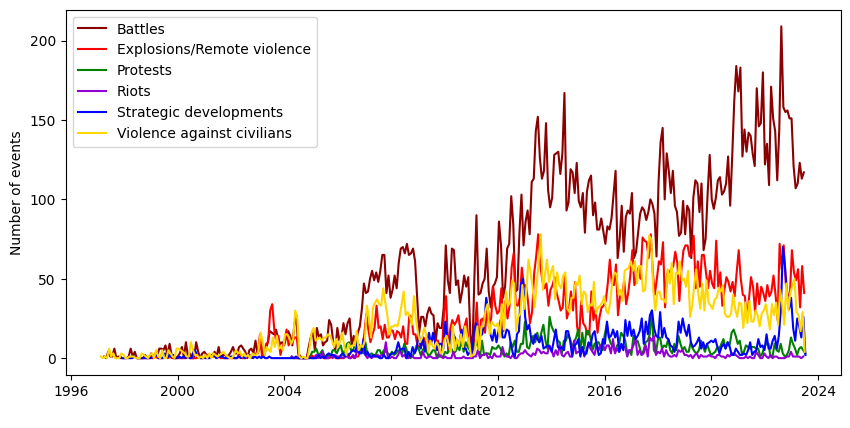

In [40]:
plt.figure(figsize=(10,5))
color_dict = {'Protests': 'green', 'Riots': 'darkviolet', 'Battles': 'darkred','Explosions/Remote violence': 'red', 'Strategic developments': 'blue',
'Violence against civilians': 'gold'}
for region in reg:
    re=df.loc[df["region"] == region]
    for typ in viol:
        pro = re.loc[re["event_type"] == typ]["fatalities"]
        g_pro = pro.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:              
            plt.plot(g_pro, label=typ, color=color_dict[typ])
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Plot timeline regions\timeline_%s" %region, dpi=700)
    plt.show()

In [42]:
df.groupby(pd.Grouper(freq='40320min')).count()

,event_id_cnty,year,date_timestamp,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
event_date,,,,,,,,,,,,,,,,,,,,,
1997-02-15,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
1997-03-15,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
1997-04-12,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
1997-05-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997-06-07,11,11,11,11,11,11,11,11,2,11,...,11,11,11,11,11,11,11,11,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11,205,205,205,205,205,205,205,205,14,205,...,205,205,205,205,205,205,205,205,9,205
2023-04-08,189,189,189,189,189,189,189,189,15,189,...,189,189,189,189,189,189,189,189,6,189
2023-05-06,212,212,212,212,212,212,212,212,13,212,...,212,212,212,212,212,212,212,212,15,212


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


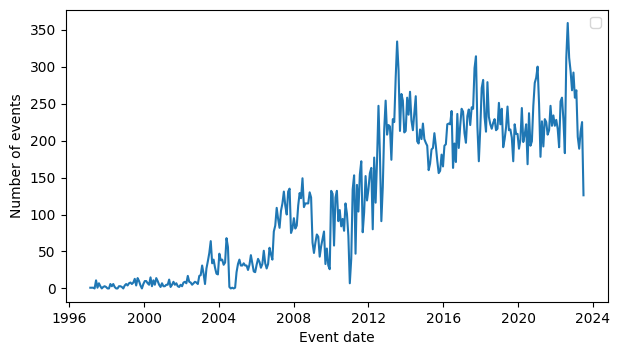

In [47]:
plt.figure(figsize=(7,4))

plt.plot(df.groupby(pd.Grouper(freq='40320min'))['event_id_cnty'].count())
plt.ylabel("Number of events")
plt.xlabel("Event date")
plt.legend()
plt.subplots_adjust(bottom=0.15)
plt.savefig(r"/home/sara/Documenti/GitHub/Climate-and-conflict/pics/conflicts.jpg", dpi=700)
plt.show()

In [39]:
df

,event_id_cnty,year,date_timestamp,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
event_date,,,,,,,,,,,,,,,,,,,,,
1997-02-15,SOM28750,1997,8.559612e+08,3,Political violence,Violence against civilians,Attack,AIAI: Al-Itihad Al-Islamia,NaN,2,...,Kismayo,-0.3603,42.5463,1,Aid Worker Security Database,Local partner-Other,'1 INGO international staff killed by Al ittih...,1,NaN,1617662601
1997-03-31,SOM1,1997,8.597592e+08,1,Political violence,Battles,Armed clash,Unidentified Armed Group (Somalia),NaN,3,...,Gaalkacyo,6.7697,47.4308,1,Xinhua,International,Fighting between Majerten (under colonel abdul...,0,NaN,1582579225
1997-04-21,SOM2,1997,8.615736e+08,1,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Somalia),NaN,3,...,Mogadishu,2.0414,45.3337,1,Xinhua,International,Two aid workers from Kuwait killed. Perpetrato...,2,NaN,1618571519
1997-06-12,SOM4,1997,8.660664e+08,1,Political violence,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),SNF: Somali National Front,8,...,Luuq,3.8000,42.5446,1,All Africa,International,"Ethiopian military attacks Somali districts, t...",16,NaN,1625524576
1997-06-12,SOM3,1997,8.660664e+08,1,Political violence,Battles,Government regains territory,Military Forces of Ethiopia (1991-2018),SNF: Somali National Front,8,...,Garbahaarey,3.3280,42.2199,1,All Africa,International,"Ethiopian military attacks Somali districts, t...",17,NaN,1625524576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-14,SOM41684,2023,1.689286e+09,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,Mogadishu - Daynile,2.0581,45.3003,1,Caasimada; Calamada; Shabelle Media Network,National,"On 14 July 2023, overnight, Al Shabaab launche...",5,NaN,1689606229
2023-07-14,SOM41660,2023,1.689286e+09,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,Tabta,0.3046,41.4394,1,Calamada,National,"On 14 July 2023, overnight, Al Shabaab launche...",0,NaN,1689606229
2023-07-14,SOM41659,2023,1.689286e+09,1,Political violence,Battles,Armed clash,Al Shabaab,NaN,2,...,Hosingow,-0.1734,41.2695,1,Calamada,National,"On 14 July 2023, overnight, Al Shabaab launche...",0,NaN,1689606229
